# Projeto de Análise de Distribuição Georreferenciada das Notas do Saresp das Escolas do Estado de São Paulo

Este projeto visa analisar a distribuição georreferenciada das notas obtidas pelos municípios de São Paulo no Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo (Saresp). O Saresp classifica os alunos em quatro categorias distintas: 'Abaixo do Básico', 'Básico', 'Adequado' e 'Avançado', refletindo diferentes níveis de desempenho, do mais baixo ao mais alto. O propósito principal é investigar a distribuição dessas notas e determinar se existe alguma correlação entre o desempenho educacional e indicadores socioeconômicos, como o Índice de Desenvolvimento Humano (IDH) e o Produto Interno Bruto (PIB) per capita dos municípios.

Para realizar essa análise, desenvolvemos uma métrica para calcular a nota agregada de cada município. Atribuímos valores a cada categoria da seguinte forma: 'Abaixo do Básico' = 0, 'Básico' = 1, 'Adequado' = 2 e 'Avançado' = 3. Em seguida, somamos todas as notas de cada município e dividimos pelo número de alunos que realizaram a prova, multiplicado por 3, que representa a pontuação máxima que um município poderia alcançar. Desta maneira, obtemos uma média ponderada para cada município. É importante ressaltar que o Saresp divulga as notas por série e matéria, contudo, este projeto focalizará exclusivamente nas notas do 3º ano do ensino médio.

## Instalações

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx

c:\Users\Giancarlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Giancarlo\AppData\Local\Temp\ipykernel_22232\2328086925.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this swit

## Coletando Dados

In [52]:
sp_metro = gpd.read_file('saresp_em.shp')

In [53]:
sp_metro = sp_metro.to_crs(epsg=31983)

In [54]:
sp_metro.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Linguas

In [55]:
from pysal.lib import weights
w = weights.KNN.from_dataframe(sp_metro, k = 8)
w.transform = 'R'
sp_metro['linguas_movel'] = weights.spatial_lag.lag_spatial(w, sp_metro['linguas'])

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001BF8E35FC90>

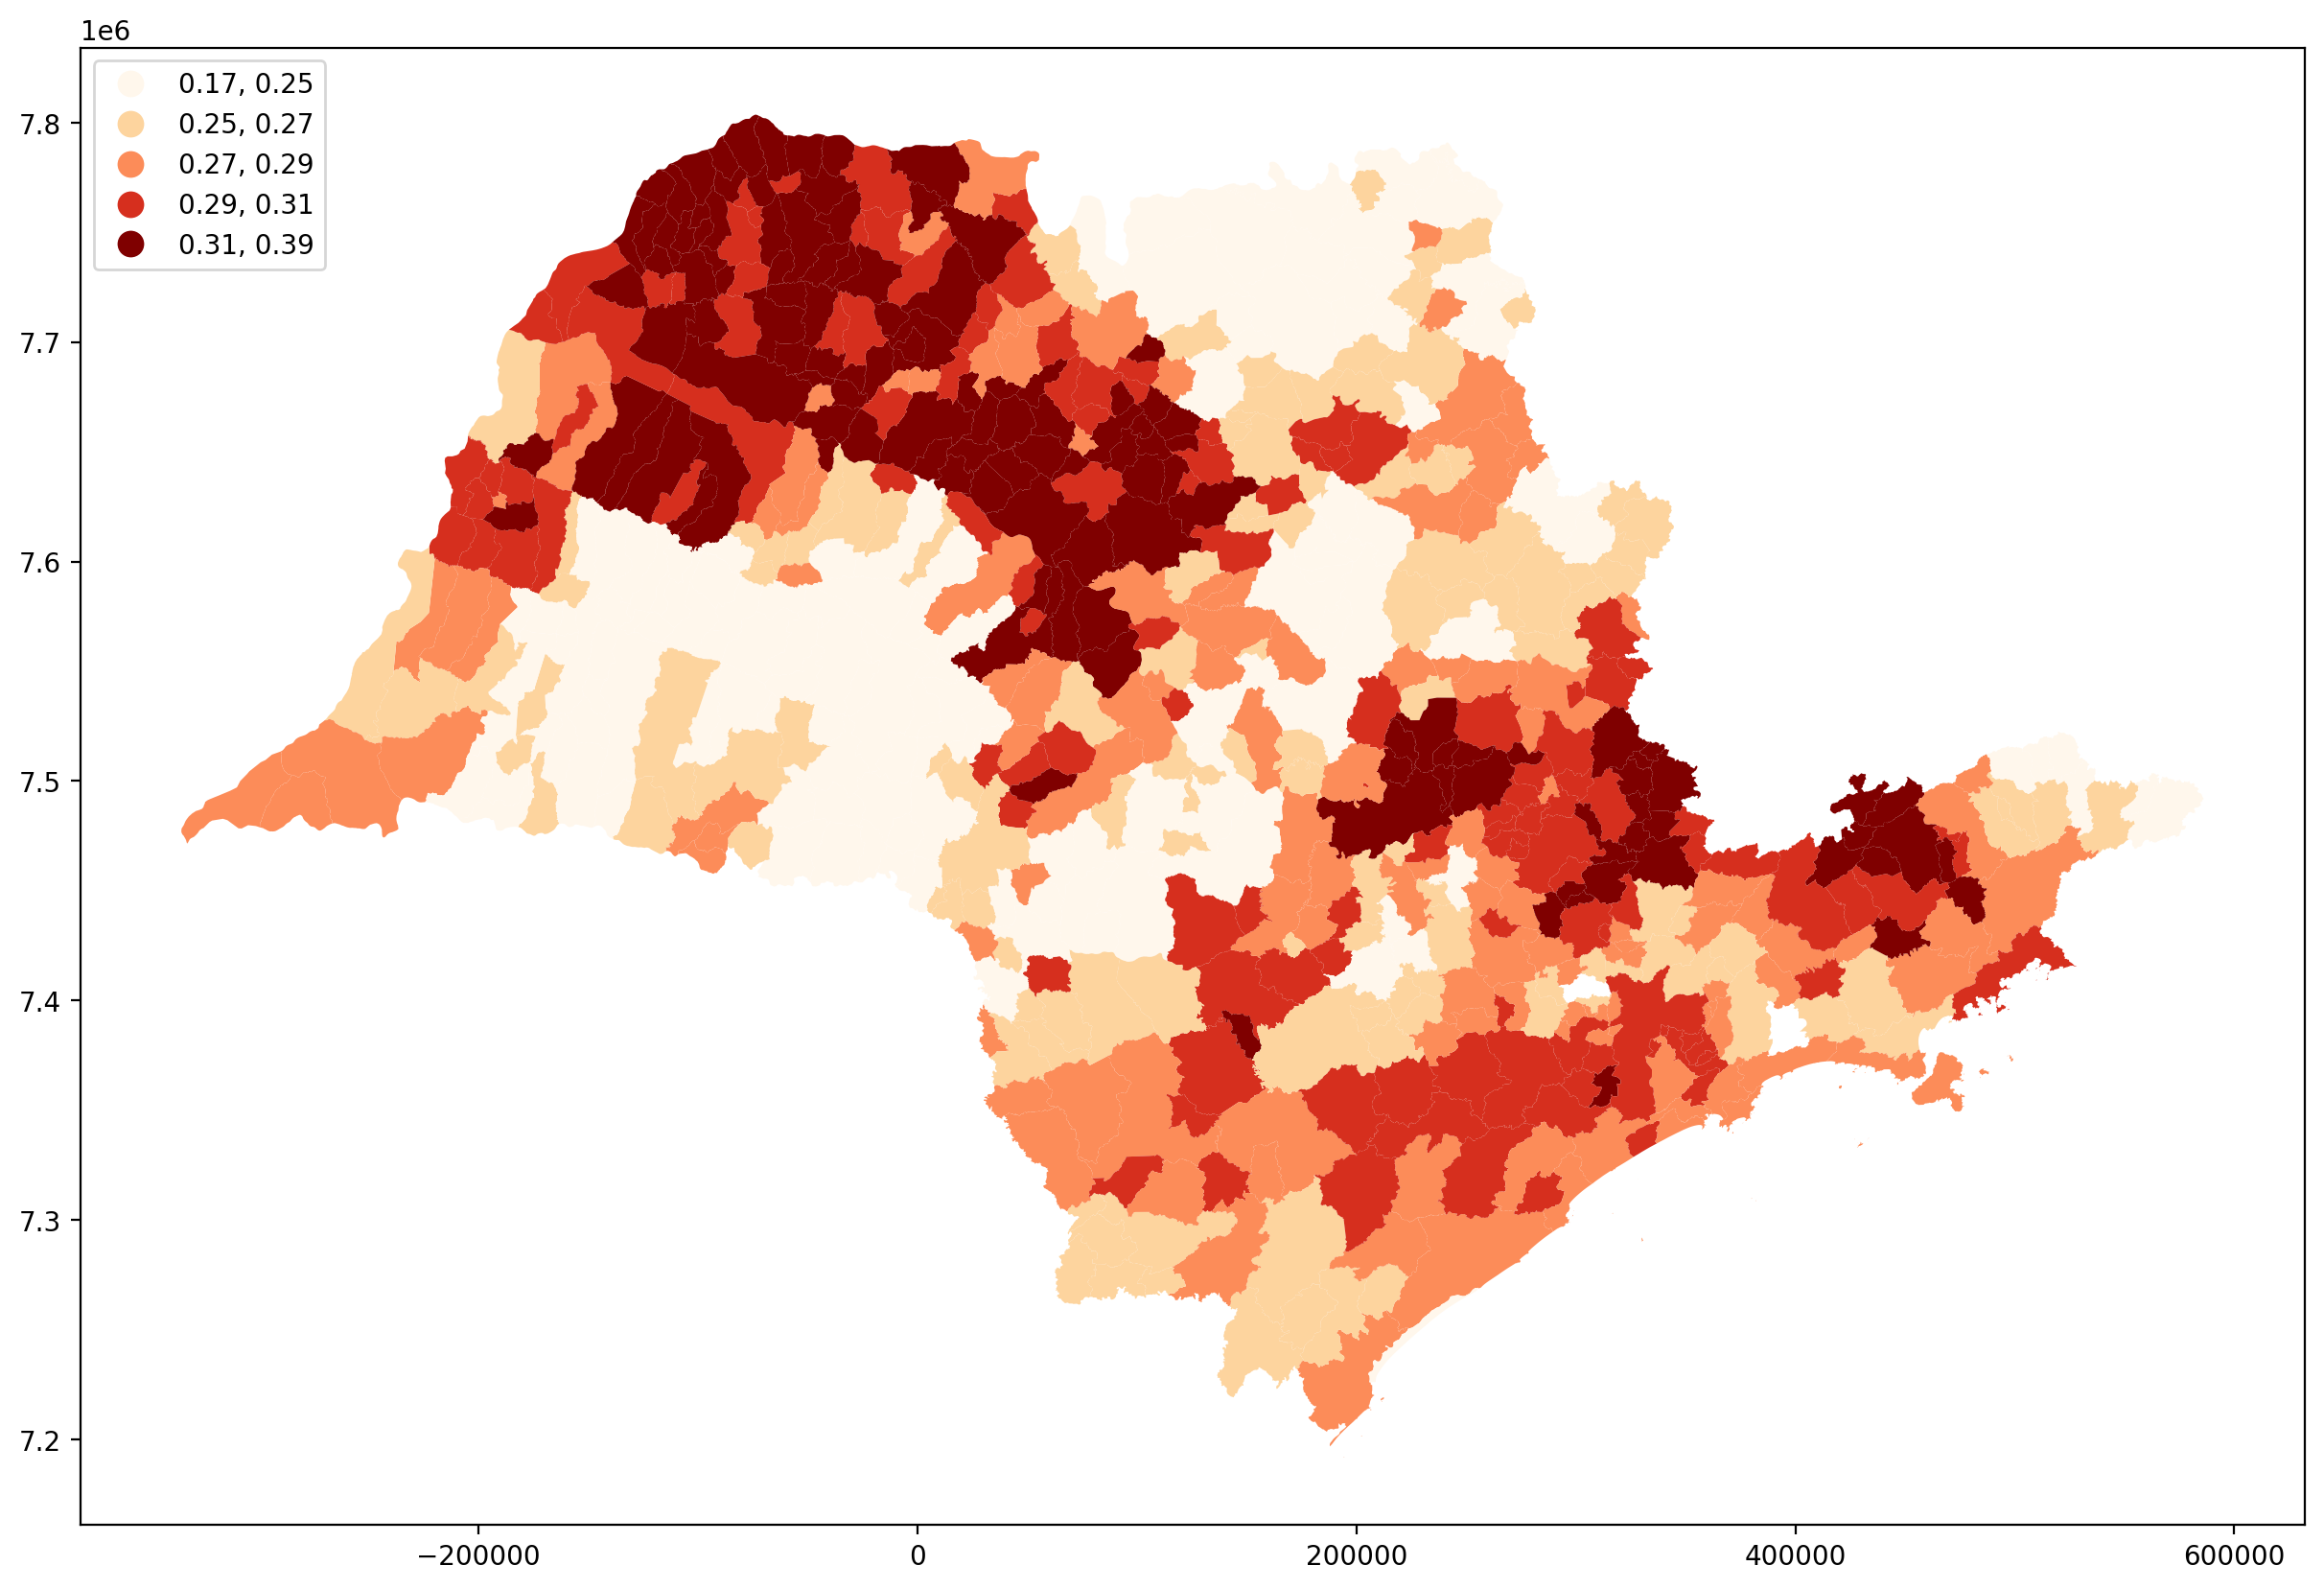

In [197]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import contextily
f, ax = plt.subplots(1, figsize=(20,10))
sp_metro.plot(column = 'linguas_movel',
        cmap = 'OrRd',
        scheme = 'quantiles',
        k = 5,
        edgecolor = 'white',
        linewidth=0.,
        alpha=1,
        legend=True,
        legend_kwds={'loc':2},
        ax = ax)

contextily.add_basemap(ax,
                       crs=sp_metro.crs,

                      )

In [56]:
from pysal.lib import weights
from esda.moran import Moran
w = weights.KNN.from_dataframe(sp_metro, k = 10)
w.transform = 'R'
moran = Moran(sp_metro['linguas_movel'], w)

In [57]:
from esda.moran import Moran_Local
moran_loc = Moran_Local(sp_metro['linguas_movel'], w)

In [58]:
moran.I

0.7069158930105577

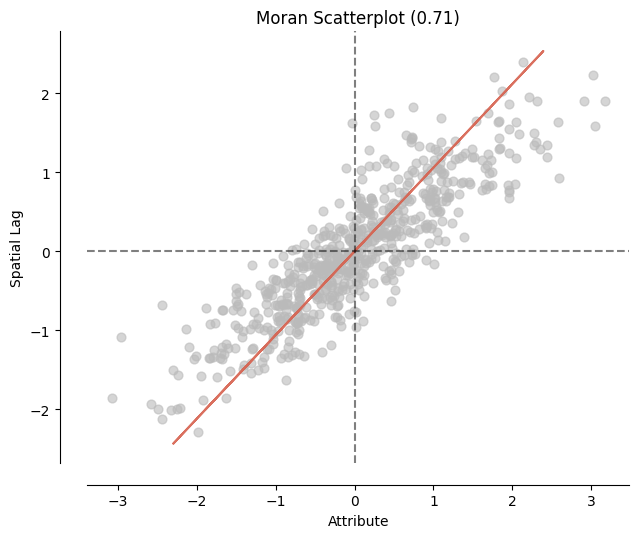

In [59]:
from matplotlib import pyplot as plt
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

In [60]:
from esda.moran import Moran_Local

In [61]:
moran_loc = Moran_Local(sp_metro['linguas_movel'], w)

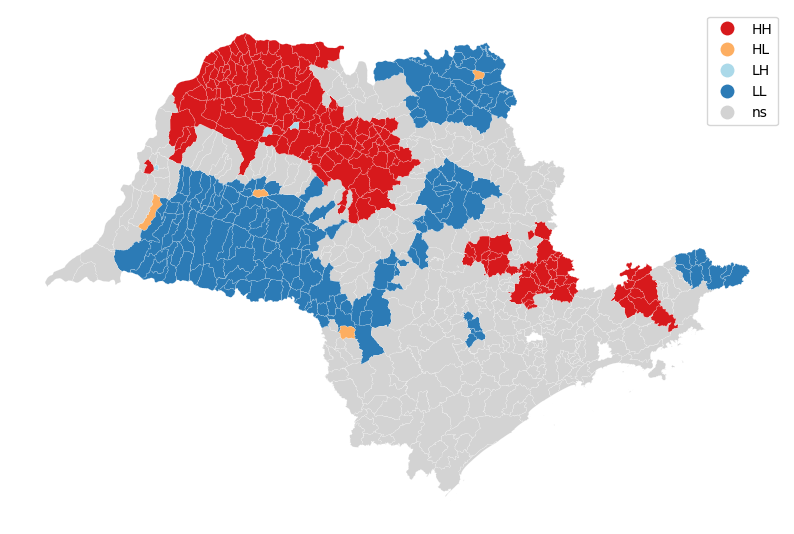

In [62]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, sp_metro, p=0.05, figsize = (10,10))
plt.show()

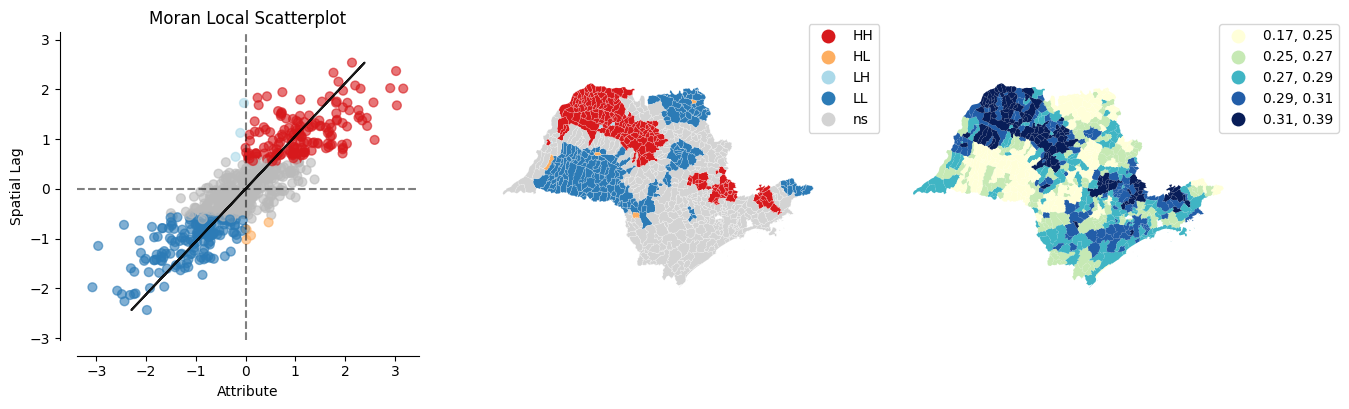

In [63]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, sp_metro,
                           'linguas_movel')
plt.show()

# Matemática	

In [64]:
sp_metro['mat_movel'] = weights.spatial_lag.lag_spatial(w, sp_metro['mat'])

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001BF8EE4C040>

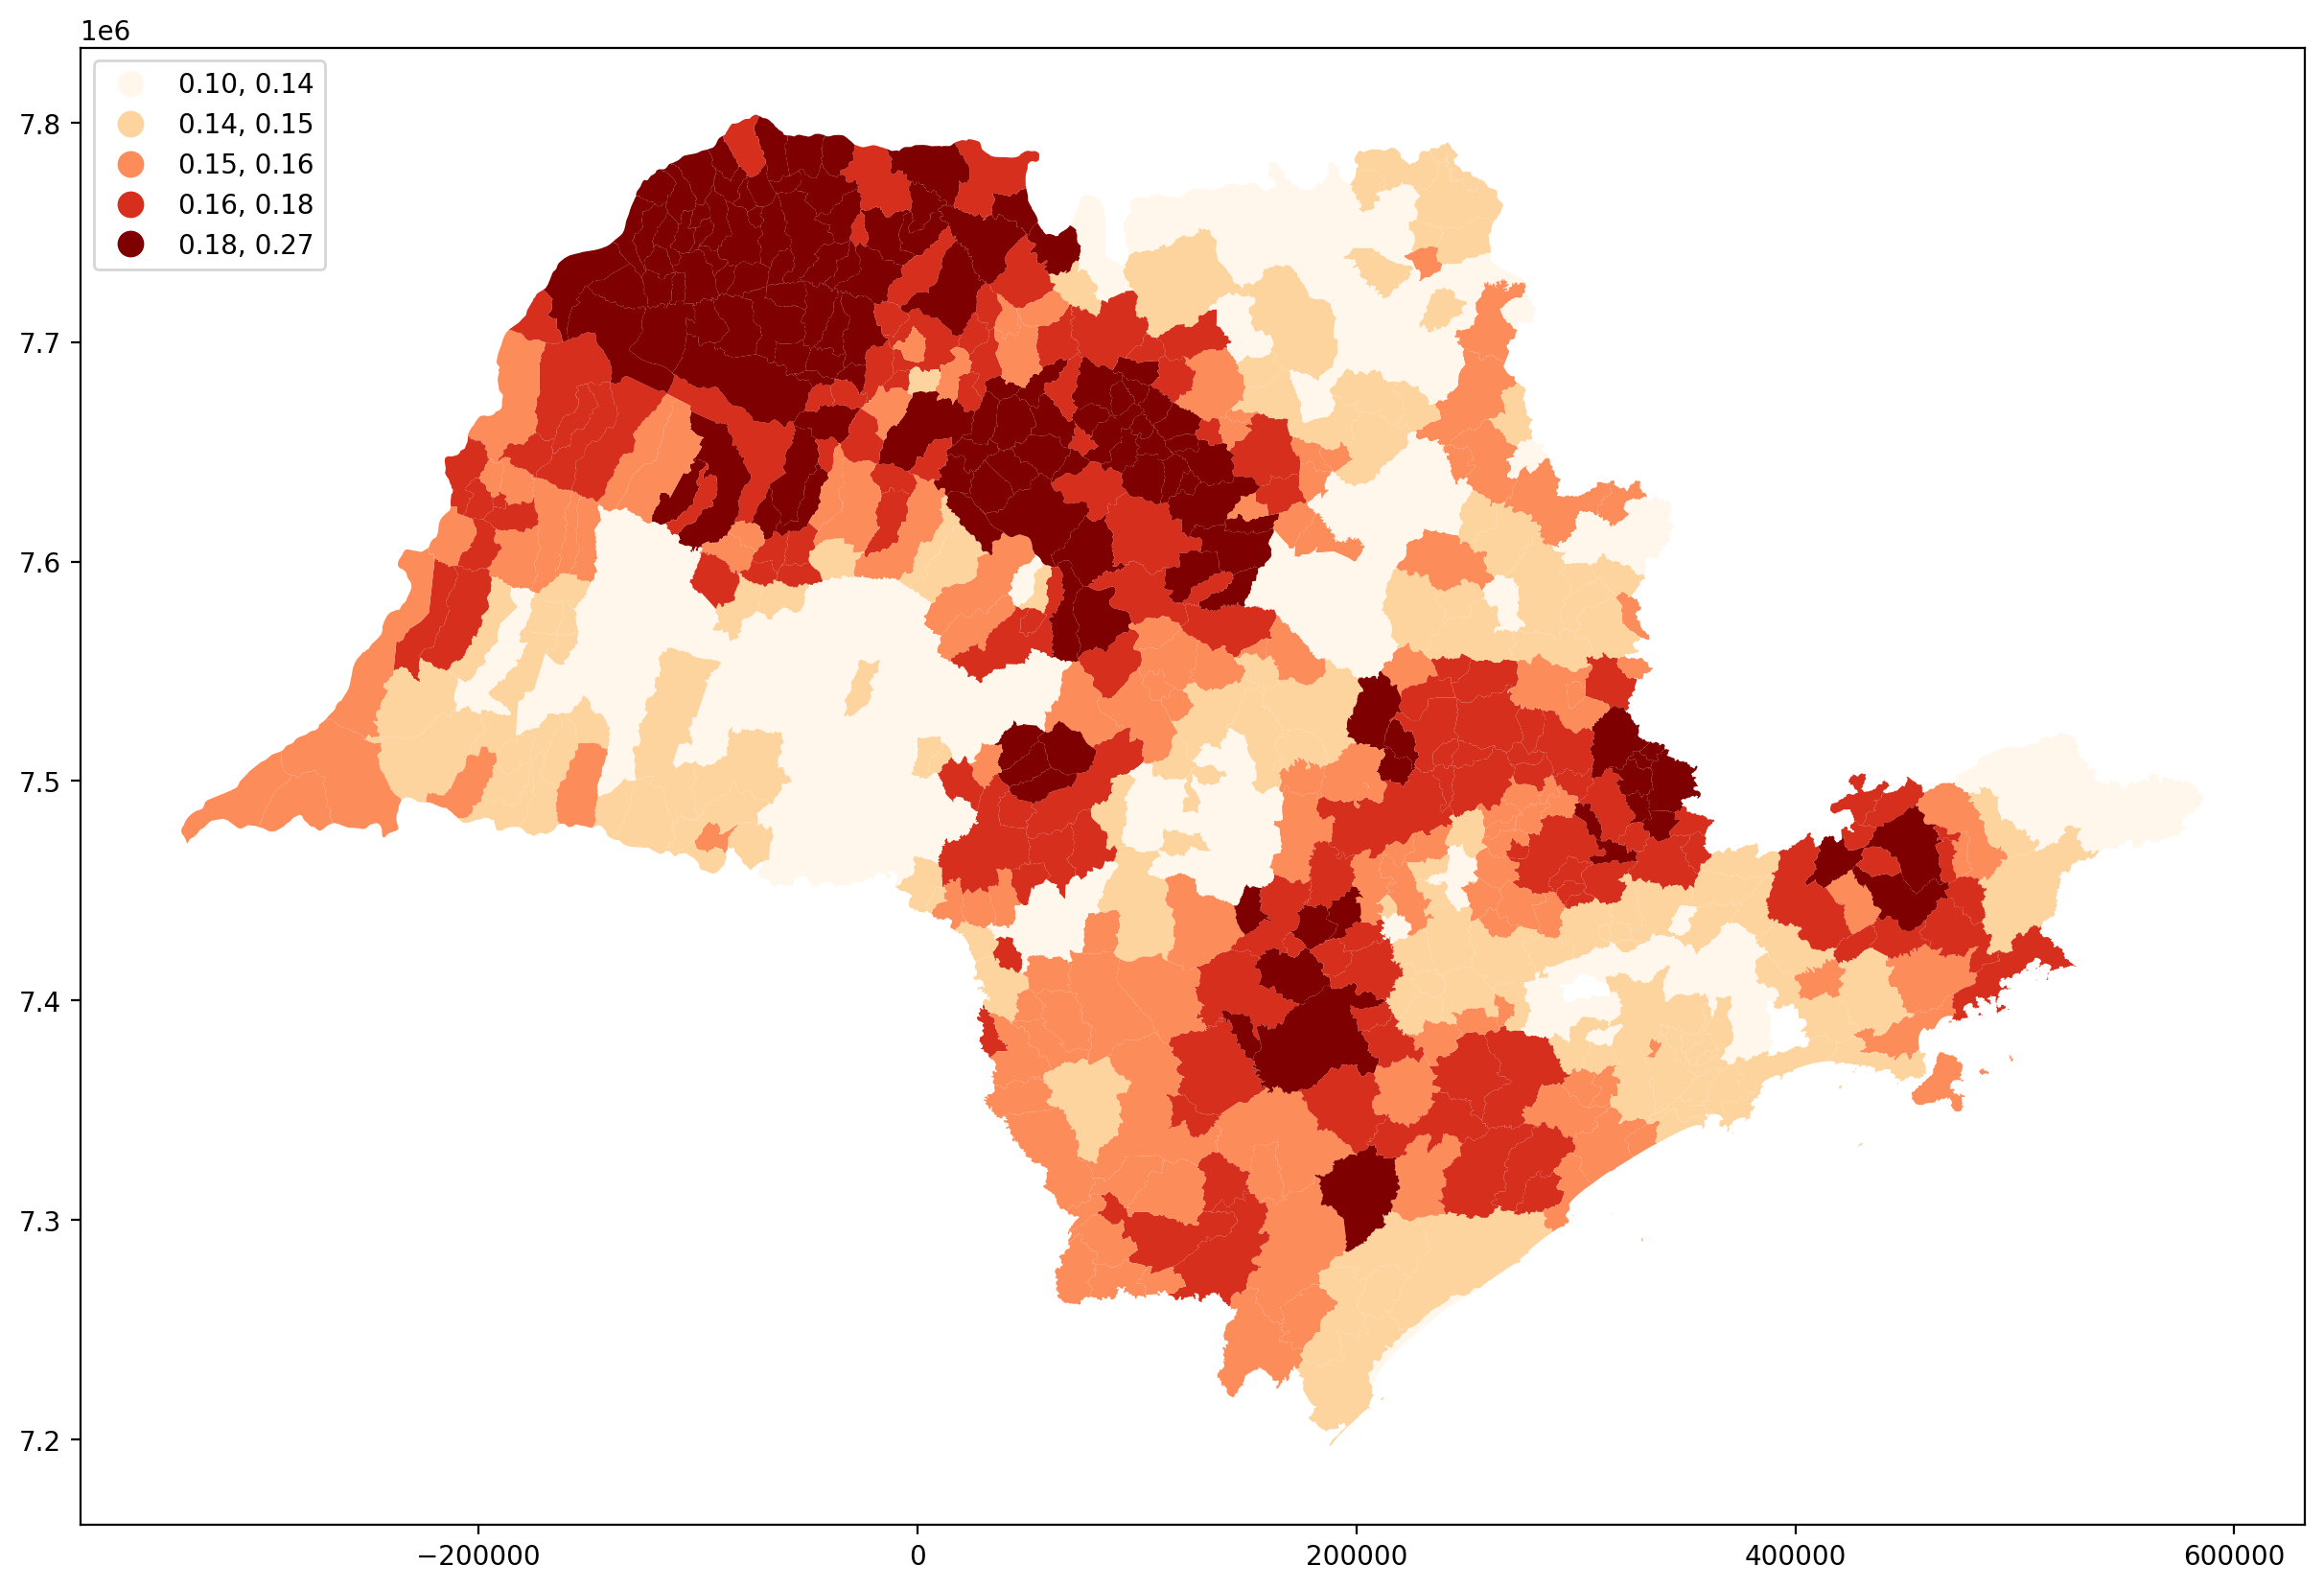

In [ ]:
import matplotlib.pyplot as plt
import contextily
f, ax = plt.subplots(1, figsize=(20,10))
sp_metro.plot(column = 'mat_movel',
        cmap = 'OrRd',
        scheme = 'quantiles',
        k = 5,
        edgecolor = 'white',
        linewidth=0.,
        alpha=1,
        legend=True,
        legend_kwds={'loc':2},
        ax = ax)

contextily.add_basemap(ax,
                       crs=sp_metro.crs,

                      )

In [65]:
moran = Moran(sp_metro['mat_movel'], w)

In [66]:
moran_loc = Moran_Local(sp_metro['mat_movel'], w)

In [67]:
moran.I

0.7687181233326135

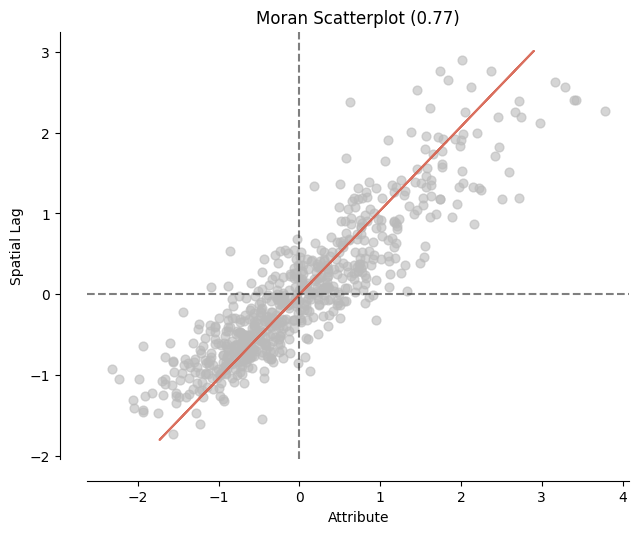

In [68]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

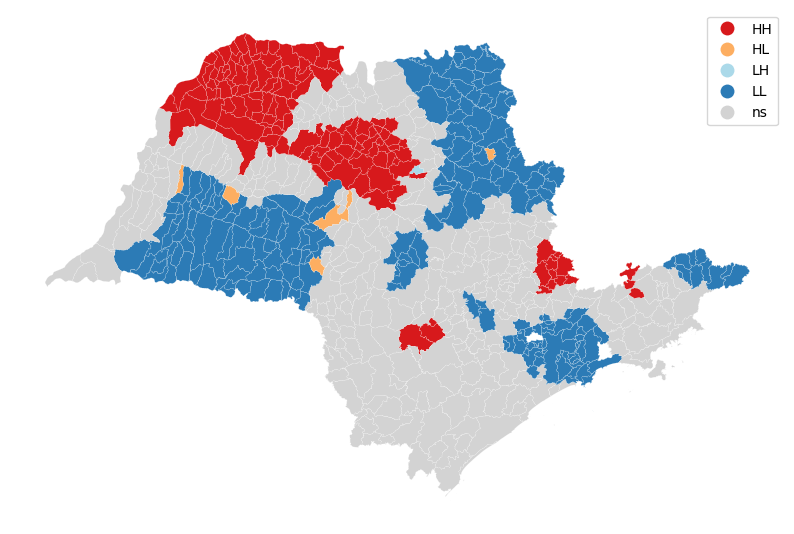

In [69]:
moran_loc = Moran_Local(sp_metro['mat_movel'], w)
lisa_cluster(moran_loc, sp_metro, p=0.05, figsize = (10,10))
plt.show()

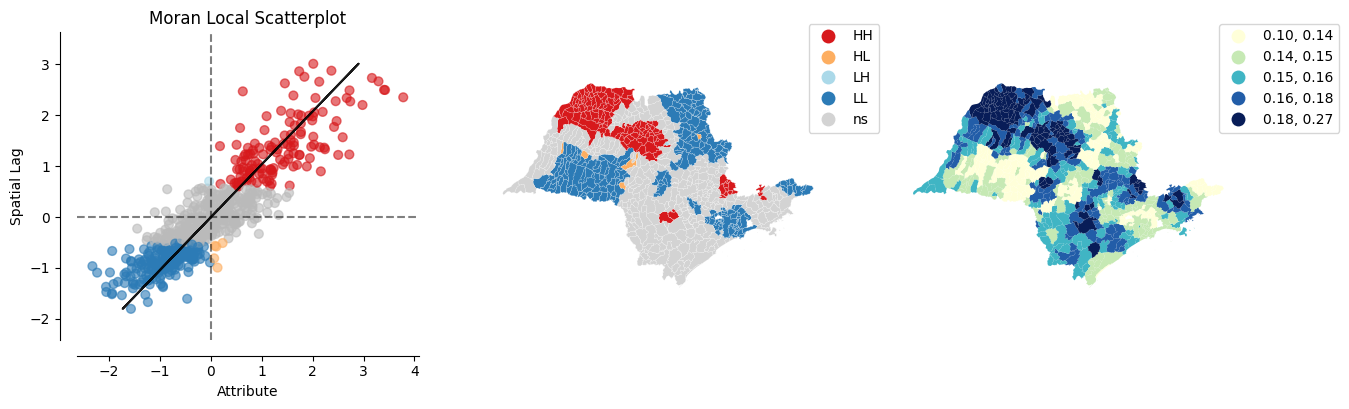

In [70]:
plot_local_autocorrelation(moran_loc, sp_metro,
                           'mat_movel')
plt.show()

## Ciencias

In [71]:
sp_metro['ciencias_movel'] = weights.spatial_lag.lag_spatial(w, sp_metro['ciencias'])

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001BF959304F0>

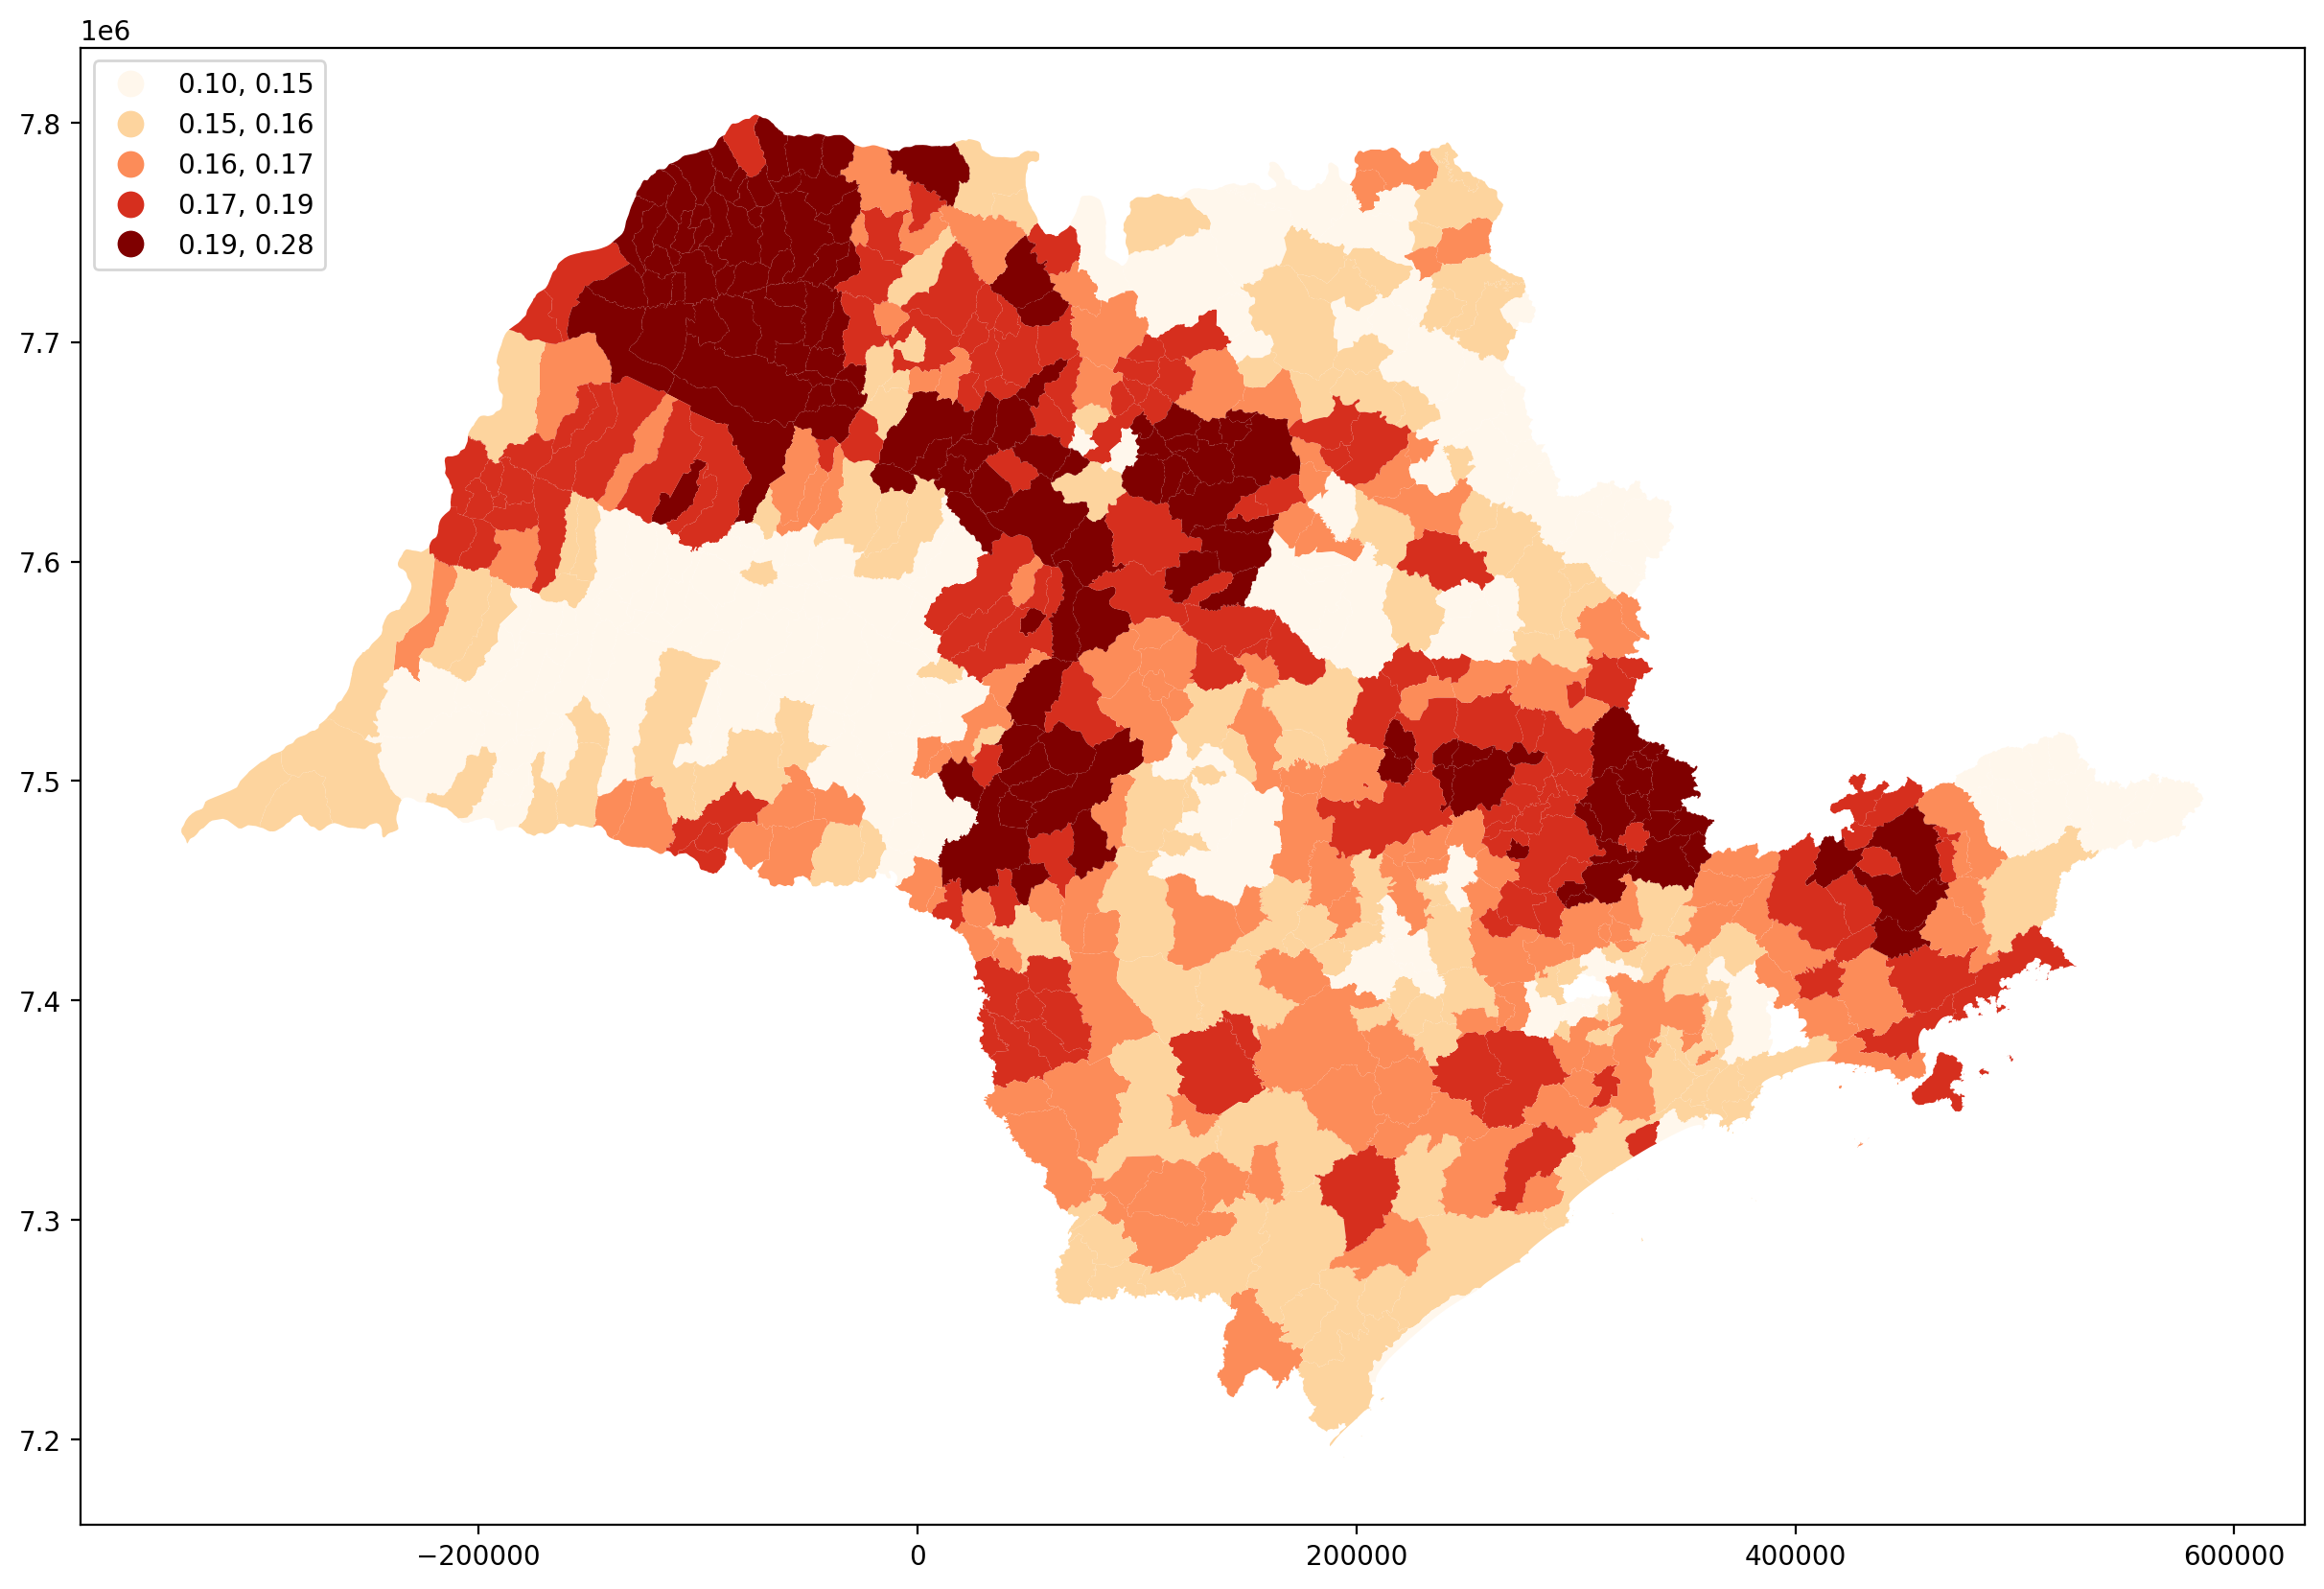

In [ ]:
import matplotlib.pyplot as plt
import contextily
f, ax = plt.subplots(1, figsize=(20,10))
sp_metro.plot(column = 'ciencias_movel',
        cmap = 'OrRd',
        scheme = 'quantiles',
        k = 5,
        edgecolor = 'white',
        linewidth=0.,
        alpha=1,
        legend=True,
        legend_kwds={'loc':2},
        ax = ax)

contextily.add_basemap(ax,
                       crs=sp_metro.crs,

                      )

In [72]:
moran = Moran(sp_metro['ciencias_movel'], w)

In [73]:
moran_loc = Moran_Local(sp_metro['ciencias_movel'], w)

In [74]:
moran.I

0.7441353220341809

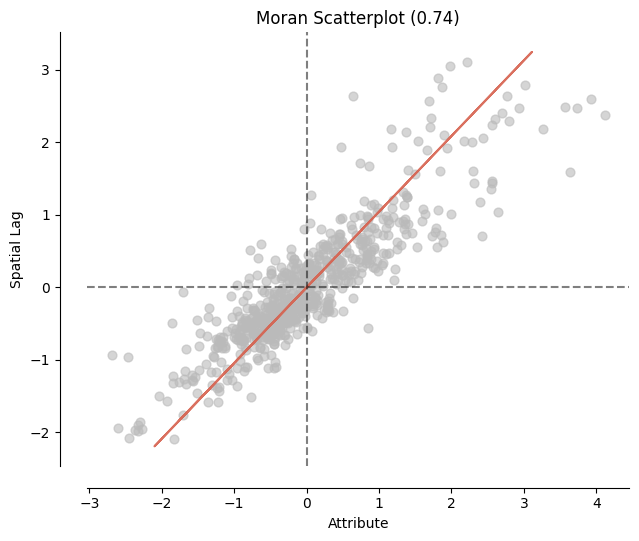

In [75]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

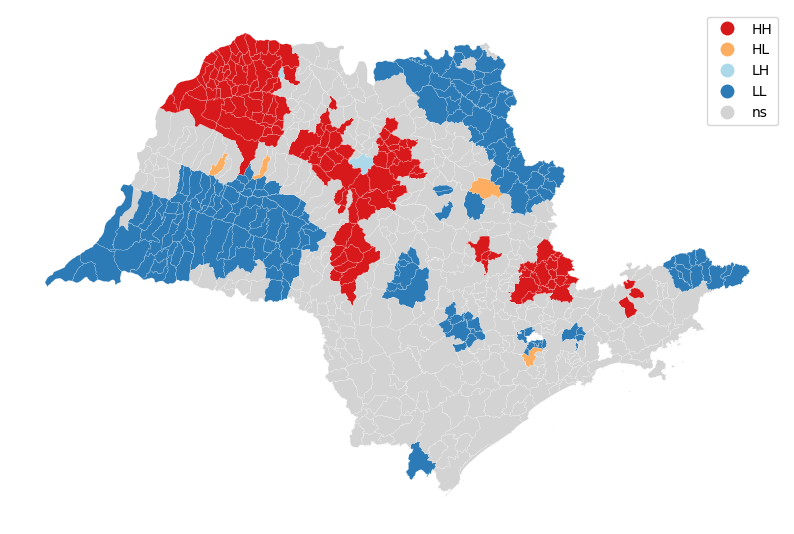

In [76]:
moran_loc = Moran_Local(sp_metro['ciencias_movel'], w)
lisa_cluster(moran_loc, sp_metro, p=0.05, figsize = (10,10))
plt.show()

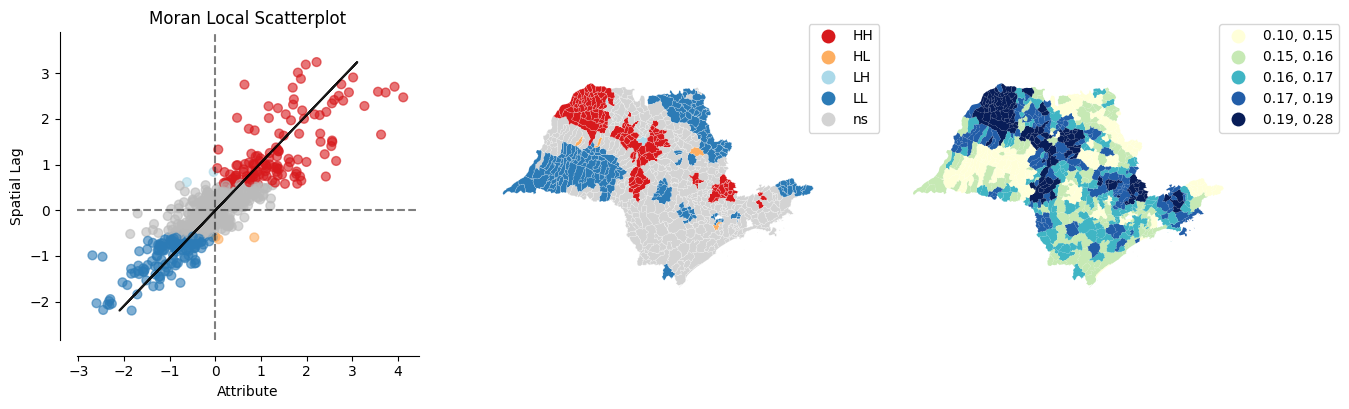

In [77]:
plot_local_autocorrelation(moran_loc, sp_metro,
                           'ciencias_movel')
plt.show()

## Adicionando PIB per capita e IDH

In [78]:
pib_per_capita = pd.read_csv('pib_per_capita.csv')

In [79]:
pib_per_capita = pib_per_capita.rename(columns={"Local": "NM_MUN",' "undefined"': 'pib_per_capita'})
pib_per_capita.head()


NM_MUN  pib_per_capita
0        Adamantina        33966.40
1            Adolfo        31581.42
2             Aguaí        28831.44
3    Águas da Prata        21079.28
4  Águas de Lindóia        28371.89

In [80]:
pib_per_capita['NM_MUN'] = pib_per_capita['NM_MUN'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
pib_per_capita['NM_MUN'] = pib_per_capita['NM_MUN'].str.upper()


In [81]:
sp_metro = sp_metro.merge(pib_per_capita, on='NM_MUN', how='left')

In [82]:
sp_metro.head()

CD_MUN            NM_MUN SIGLA  AREA_KM2   linguas       mat  ciencias  \
0  3500105        ADAMANTINA    SP   411.987  0.194719  0.118812  0.141914   
1  3500204            ADOLFO    SP   211.055  0.444444  0.347222  0.263889   
2  3500303             AGUAI    SP   474.554  0.220085  0.108974  0.134615   
3  3500402    AGUAS DA PRATA    SP   142.673  0.367816  0.137931  0.195402   
4  3500501  AGUAS DE LINDOIA    SP    60.126  0.389831  0.265537  0.254237   

                                            geometry  linguas_movel  \
0  POLYGON ((-128363.276 7620920.239, -128232.291...       0.211883   
1  POLYGON ((16167.106 7648225.443, 16330.817 764...       0.319430   
2  POLYGON ((295919.287 7569377.514, 295962.358 7...       0.270541   
3  POLYGON ((320664.462 7586207.973, 320737.239 7...       0.283941   
4  POLYGON ((334715.729 7517393.900, 334992.389 7...       0.332291   

   mat_movel  ciencias_movel  pib_per_capita  
0   0.120032        0.122517        33966.40  
1   0.185709        0.211830        31581.42  
2   0.145791        0.154175        28831.44  
3   0.153068        0.164452        21079.28  
4   0.183235        0.198824        28371.89

In [83]:
idh = pd.read_csv('idh.csv')


In [84]:
idh = idh.rename(columns={"Local": "NM_MUN",' "undefined"': 'idh'})
idh.head()

NM_MUN    idh
0        Adamantina  0.790
1            Adolfo  0.730
2             Aguaí  0.715
3    Águas da Prata  0.781
4  Águas de Lindóia  0.745

In [85]:
idh['NM_MUN'] = idh['NM_MUN'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
idh['NM_MUN'] = idh['NM_MUN'].str.upper()


In [86]:
sp_metro = sp_metro.merge(idh, on='NM_MUN', how='left')

In [87]:
sp_metro.head()

CD_MUN            NM_MUN SIGLA  AREA_KM2   linguas       mat  ciencias  \
0  3500105        ADAMANTINA    SP   411.987  0.194719  0.118812  0.141914   
1  3500204            ADOLFO    SP   211.055  0.444444  0.347222  0.263889   
2  3500303             AGUAI    SP   474.554  0.220085  0.108974  0.134615   
3  3500402    AGUAS DA PRATA    SP   142.673  0.367816  0.137931  0.195402   
4  3500501  AGUAS DE LINDOIA    SP    60.126  0.389831  0.265537  0.254237   

                                            geometry  linguas_movel  \
0  POLYGON ((-128363.276 7620920.239, -128232.291...       0.211883   
1  POLYGON ((16167.106 7648225.443, 16330.817 764...       0.319430   
2  POLYGON ((295919.287 7569377.514, 295962.358 7...       0.270541   
3  POLYGON ((320664.462 7586207.973, 320737.239 7...       0.283941   
4  POLYGON ((334715.729 7517393.900, 334992.389 7...       0.332291   

   mat_movel  ciencias_movel  pib_per_capita    idh  
0   0.120032        0.122517        33966.40  0.790  
1   0.185709        0.211830        31581.42  0.730  
2   0.145791        0.154175        28831.44  0.715  
3   0.153068        0.164452        21079.28  0.781  
4   0.183235        0.198824        28371.89  0.745

## PIB per capita

In [89]:
w = weights.KNN.from_dataframe(sp_metro, k = 10)
w.transform = 'R'
sp_metro['pib_movel'] = weights.spatial_lag.lag_spatial(w, sp_metro['pib_per_capita'])

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000013BC919F420>

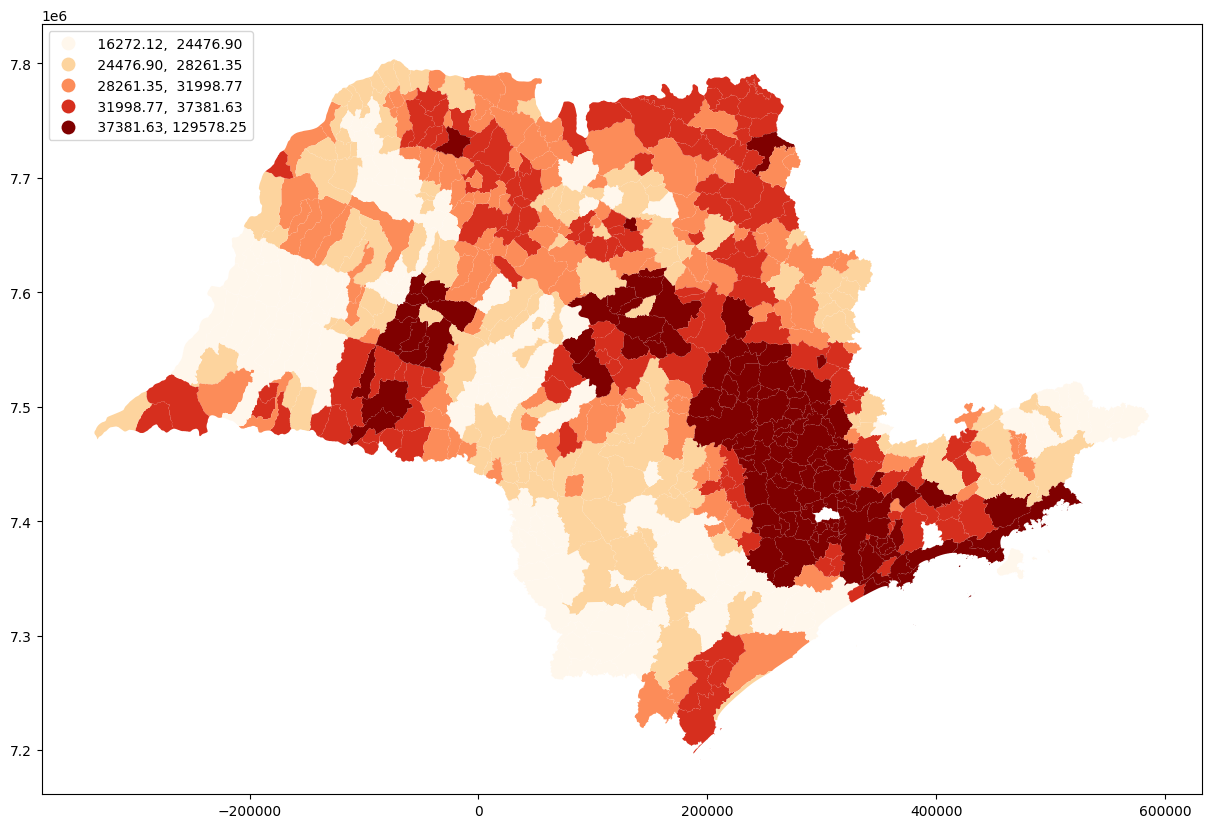

In [90]:
import matplotlib.pyplot as plt
import contextily
f, ax = plt.subplots(1, figsize=(20,10))
sp_metro.plot(column = 'pib_movel',
        cmap = 'OrRd',
        scheme = 'quantiles',
        k = 5,
        edgecolor = 'white',
        linewidth=0.,
        alpha=1,
        legend=True,
        legend_kwds={'loc':2},
        ax = ax)

contextily.add_basemap(ax,
                       crs=sp_metro.crs,

                      )

In [91]:
moran_loc = Moran_Local(sp_metro['pib_movel'], w)

In [107]:
moran = Moran(sp_metro['pib_movel'], w)
moran.I

0.8318928083247987

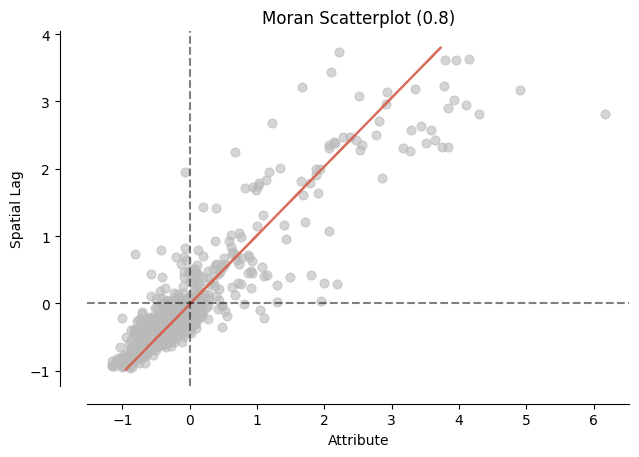

In [98]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

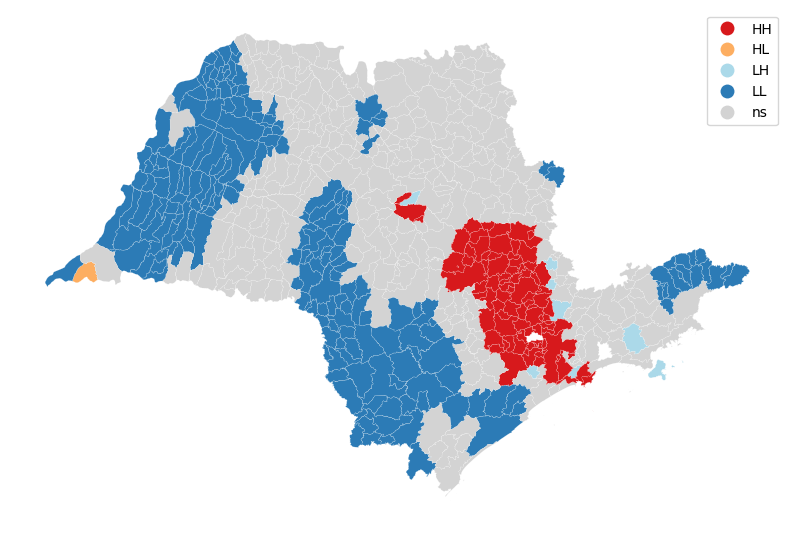

In [99]:
moran_loc = Moran_Local(sp_metro['pib_movel'], w)
lisa_cluster(moran_loc, sp_metro, p=0.05, figsize = (10,10))
plt.show()

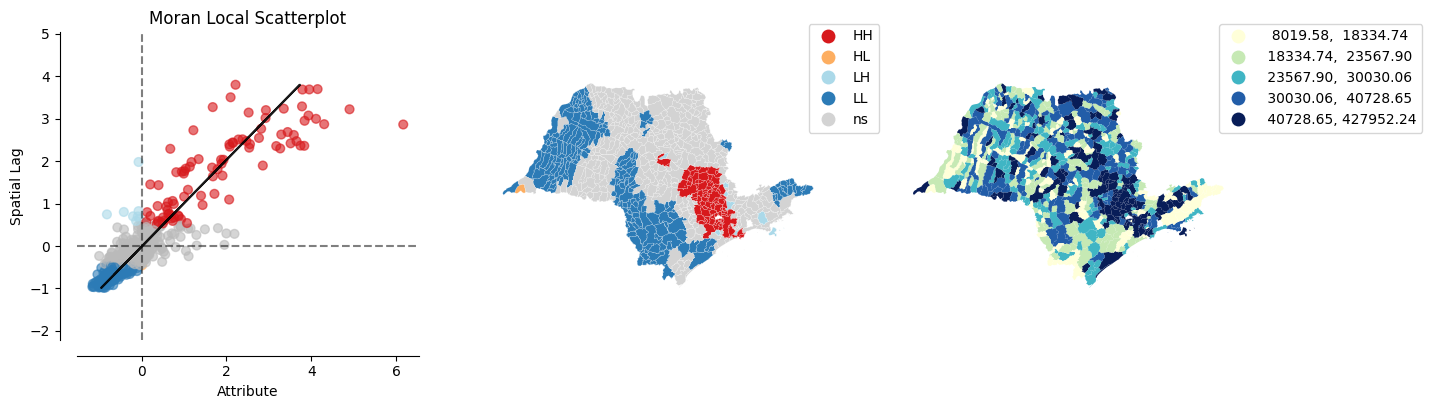

In [100]:
plot_local_autocorrelation(moran_loc, sp_metro,
                           'pib_per_capita')
plt.show()

## IDH

In [102]:
w = weights.KNN.from_dataframe(sp_metro, k = 10)
w.transform = 'R'
sp_metro['idh_movel'] = weights.spatial_lag.lag_spatial(w, sp_metro['idh'])

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000013BA09E9A80>

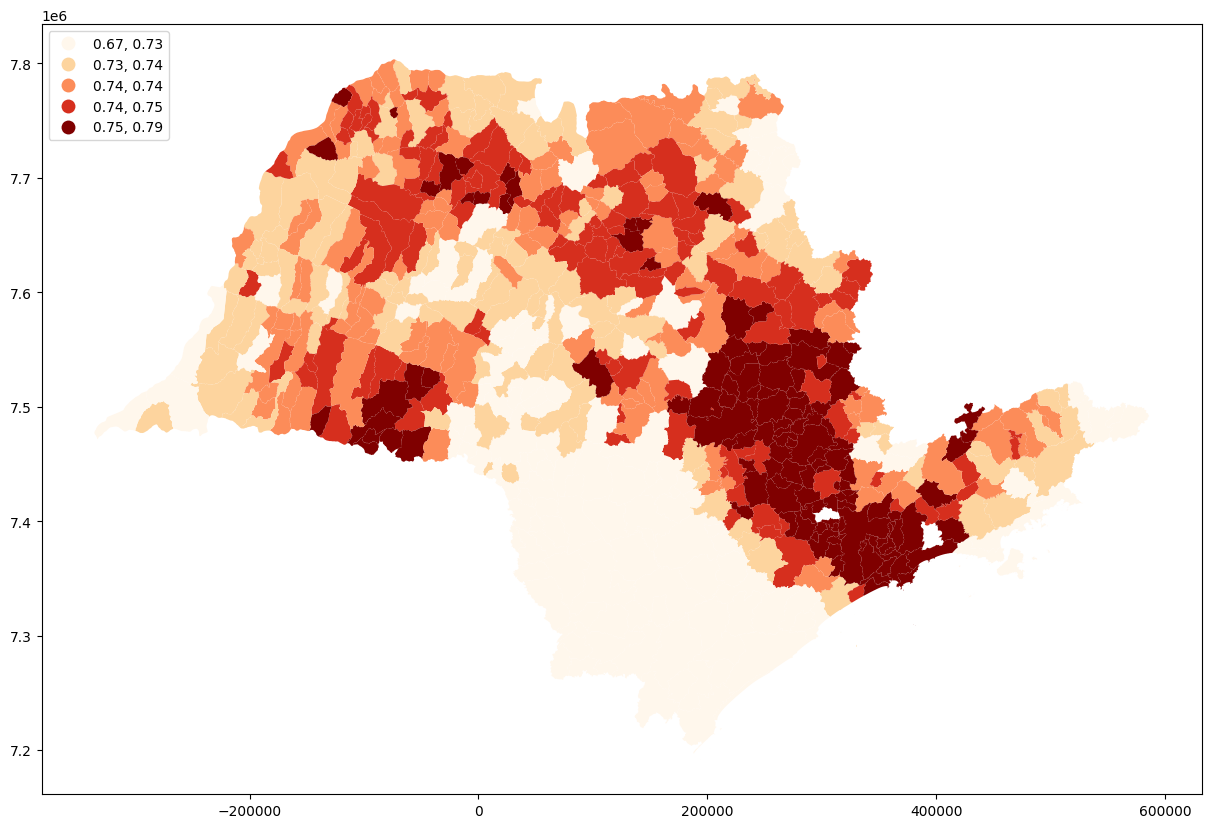

In [103]:
import matplotlib.pyplot as plt
import contextily
f, ax = plt.subplots(1, figsize=(20,10))
sp_metro.plot(column = 'idh_movel',
        cmap = 'OrRd',
        scheme = 'quantiles',
        k = 5,
        edgecolor = 'white',
        linewidth=0.,
        alpha=1,
        legend=True,
        legend_kwds={'loc':2},
        ax = ax)

contextily.add_basemap(ax,
                       crs=sp_metro.crs,

                      )

In [104]:
moran_loc = Moran_Local(sp_metro['idh_movel'], w)

In [106]:
moran = Moran(sp_metro['idh_movel'], w)
moran.I

0.8318928083247987

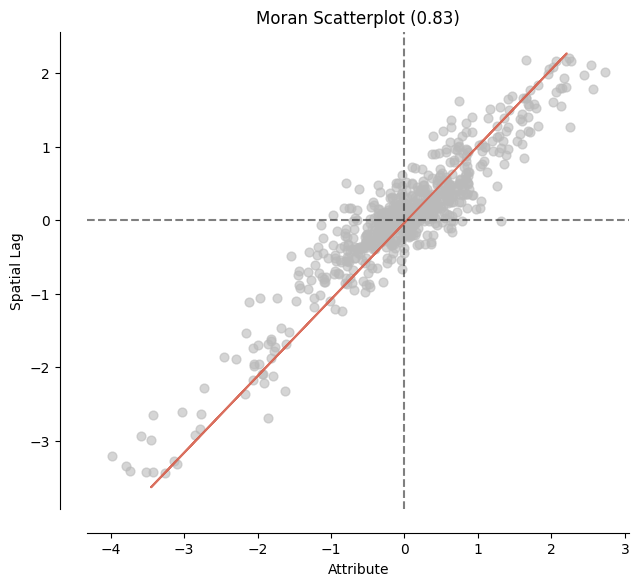

In [108]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

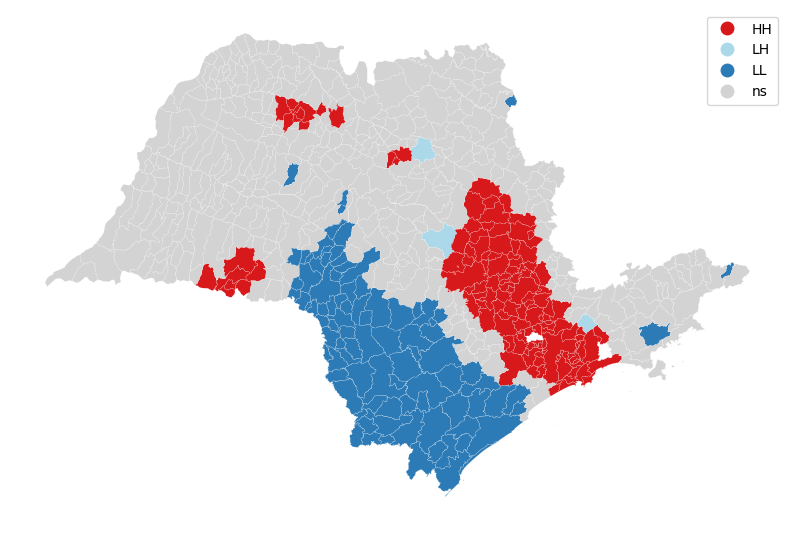

In [111]:
moran_loc = Moran_Local(sp_metro['idh_movel'], w)
lisa_cluster(moran_loc, sp_metro, p=0.05, figsize = (10,10))
plt.show()

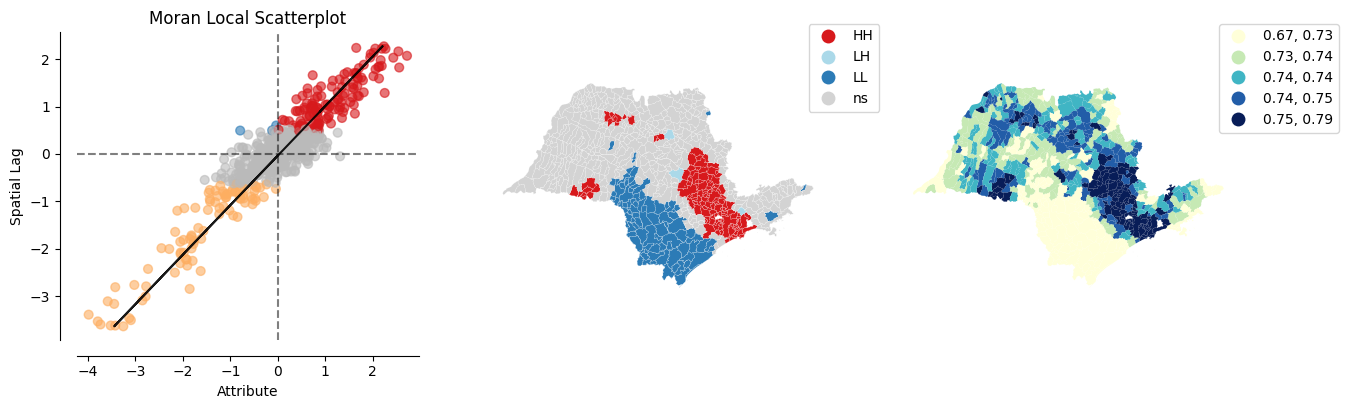

In [112]:
plot_local_autocorrelation(moran_loc, sp_metro,
                           'idh_movel')
plt.show()

## Conclusão

Como podemos ver, a distribuição 